## LabExercise: Image Rotation

**Step by Step Development**

```
When developing programs that involve some math I am unsure about I proceed as follows:

Make a minimalistic program that takes you from start to finish without doing the ‘real’ thing: in this case I would start with a program that uses the framework just to copy the image from the camera and display it in the lower canvas.

That first step doesn’t require me to manipulate individual pixel values. So instead of just copying i would then do something simple as ‘inverting’ all pixel values (new value = 255 - old value) while making the copy.

Only when that works start on the real thing: the rotation.
Write a method (function) to do so using the simple form of interpolation: nearest neighbor interpolation.

And the last step requires implementing the bilinear interpolation.

The added advantage of such an approach is that some modular design is built into the development process.
In this way I am forced not to spread around functionality over all my code that should really be concentrated in one function or class (like for the interpolation).

And of course: every step should be tested before proceeding to the next step.
```
***The assignment***

The program you have to make is simple. Start with the notebook again. In the top part the live video stream is shown.


You should make a new image of the same size as the frame from from the camera stream. Its contents should be the camera image rotated around the center over ϕ degrees.

So if this is your input image: <img src="files/cameraman.png" style="width: 300px ">

then this should be the rotated version: <img src="files/cameramanrotated.png" style="width: 300px ">

(you don’t need to display the coordinate values alongside the image...)

Note: you really have to rotate the image pixel by pixel yourself! Use nearest neigbor interpolation to start with and only when that is working you have to add bilinear interpolation.

The image rotation angle should be user-selectable using a control.

###### © Copyright 2013, 2014, Rein van den Boomgaard & 2015, 2016, 2017, 2018 moderated by Anthony 'Toto' van Inge & 2019 moderated by Edwin Steffens.  Last updated on May 8, 2019. ######

In [1]:
from ipywidgets import FloatSlider
import math

slider = FloatSlider(min=0.0, max=2 * math.pi, description="angle")
display(slider)

FloatSlider(value=0.0, description='angle', max=6.283185307179586)

[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (1100) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


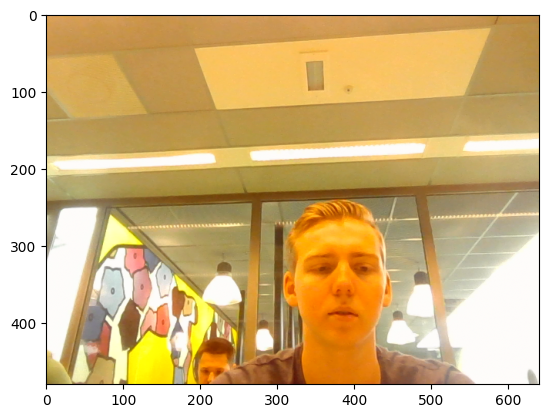

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

angle = slider.value

def get_rot_matrix(angle):
    return np.array([
        [math.cos(angle), -math.sin(angle)],
        [math.sin(angle), math.cos(angle)]
    ])

def get_pixel(img, coord):
    x, y = coord
    if y < 0 or y >= len(img) or x < 0 or x >= len(img[y]):
        return np.array((0, 0, 0))
    return img[y][x]

cap = cv2.VideoCapture(0)

height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output = np.zeros((height, width, 3))

rot_matrix = get_rot_matrix(-angle)

succes, img = cap.read()
if not succes:
    exit()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for y, column in enumerate(output):
    for x, _ in enumerate(column):
        old_coords = np.matmul(rot_matrix, np.array([[x - width / 2], [y - height / 2]]))
        old_coords += np.array([[width / 2], [height / 2]])
        old_coords.resize(2,)
        old_x, old_y = old_coords

        x1 = math.floor(old_x)
        x2 = x1 + 1
        y1 = math.floor(old_y)
        y2 = y1 + 1

        w11 = (x2 - old_x) * (y2 - old_y)
        w12 = (x2 - old_x) * (old_y - y1)
        w21 = (old_x - x1) * (y2 - old_y)
        w22 = (old_x - x1) * (old_y - y1)

        pixel = (
            w11 * get_pixel(img, (x1, y1))
            + w12 * get_pixel(img, (x1, y2))
            + w21 * get_pixel(img, (x2, y1))
            + w22 * get_pixel(img, (x2, y2))
        )

        output[y][x] = pixel / 255

plt.imshow(output)
plt.show()